
# Gym Check-ins and User Analysis

## Objective
The purpose of this notebook is to explore gym user behaviors, check-in patterns, and the impact of different subscription plans on user engagement. 

## Dataset Description
The dataset includes the following files:

- **Users Data**: Information about users, such as age, gender, location, and subscription plan.
- **Gym Locations Data**: Details on gym locations, types, and facilities offered.
- **Check-in/Checkout History**: Logs of user check-in and check-out times, workout types, and calories burned.
- **Subscription Plans**: Pricing and features of different subscription plans available.

Let's start by loading and examining the dataset.


In [5]:
!pip install kagglehub

import kagglehub
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("mexwell/gym-check-ins-and-user-metadata")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\renjx\.cache\kagglehub\datasets\mexwell\gym-check-ins-and-user-metadata\versions\2


In [6]:

# Load data
checkin_data = pd.read_csv(f'{path}/checkin_checkout_history_updated.csv')
gym_locations_data = pd.read_csv(f'{path}/gym_locations_data.csv')
subscription_plans = pd.read_csv(f'{path}/subscription_plans.csv')
users_data = pd.read_csv(f'{path}/users_data.csv')

# Preview datasets
display(users_data.head())
display(gym_locations_data.head())
display(checkin_data.head())
display(subscription_plans.head())


,user_id,first_name,last_name,age,gender,birthdate,sign_up_date,user_location,subscription_plan
0,user_1,Chris,Wilson,56,Female,2000-02-29,2023-02-06,Denver,Basic
1,user_2,Michael,Miller,46,Non-binary,1978-12-22,2023-08-08,Orlando,Pro
2,user_3,Daniel,Smith,32,Female,1962-08-30,2021-01-11,Orlando,Basic
3,user_4,David,Smith,60,Male,2003-12-05,2023-08-07,Denver,Pro
4,user_5,Chris,Jones,25,Female,2004-08-25,2021-01-08,Denver,Basic


,gym_id,location,gym_type,facilities
0,gym_1,New York,Premium,"Climbing Wall, Swimming Pool, Basketball Court"
1,gym_2,Los Angeles,Budget,"Climbing Wall, Yoga Classes, Sauna"
2,gym_3,Chicago,Budget,"Sauna, Climbing Wall, Swimming Pool"
3,gym_4,Houston,Premium,"Climbing Wall, Basketball Court, Swimming Pool"
4,gym_5,Phoenix,Standard,"Basketball Court, CrossFit, Swimming Pool"


,user_id,gym_id,checkin_time,checkout_time,workout_type,calories_burned
0,user_3291,gym_6,2023-09-10 15:55:00,2023-09-10 16:34:00,Weightlifting,462
1,user_1944,gym_2,2023-04-13 20:07:00,2023-04-13 22:43:00,Yoga,1278
2,user_958,gym_7,2023-06-10 12:24:00,2023-06-10 13:49:00,Cardio,858
3,user_811,gym_2,2023-05-23 17:11:00,2023-05-23 20:01:00,Yoga,1134
4,user_4923,gym_10,2023-02-21 06:20:00,2023-02-21 08:02:00,Weightlifting,1049


,subscription_plan,price_per_month,features
0,Basic,19.99,"Access to basic gym facilities, Limited class ..."
1,Pro,49.99,"Access to all facilities, Unlimited class acce..."
2,Student,9.99,"Access to basic facilities, Limited class acce..."


## User Demographics Analysis

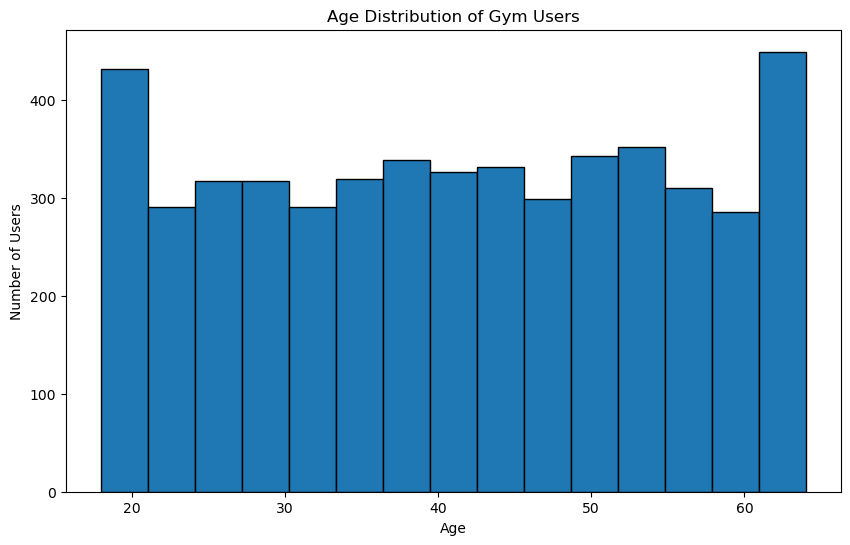

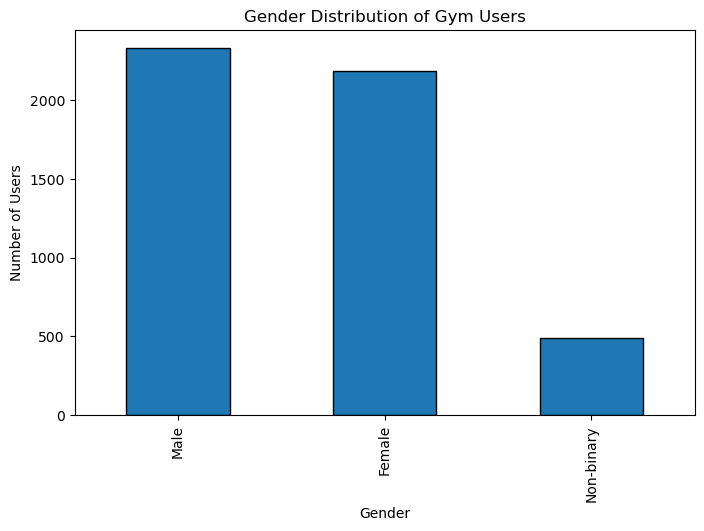

In [7]:

# Age Distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(users_data['age'], bins=15, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.title('Age Distribution of Gym Users')
plt.show()

# Gender Distribution
plt.figure(figsize=(8, 5))
users_data['gender'].value_counts().plot(kind='bar', edgecolor='black')
plt.xlabel('Gender')
plt.ylabel('Number of Users')
plt.title('Gender Distribution of Gym Users')
plt.show()


## Subscription and Location Insights

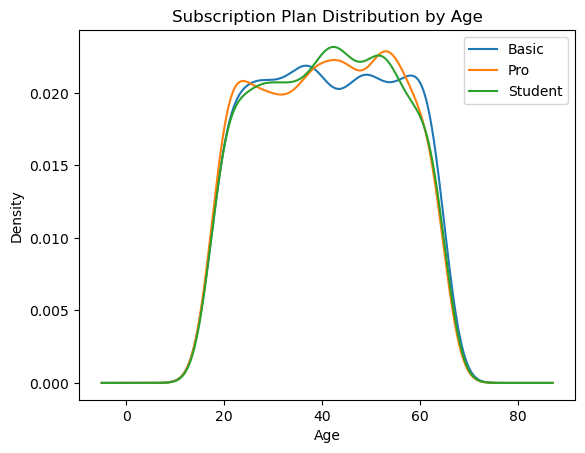

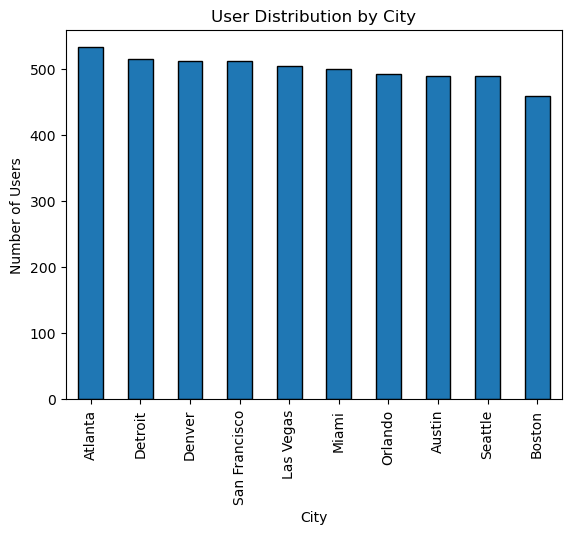

In [8]:

# Subscription Plan Distribution by Age
users_data.groupby('subscription_plan')['age'].plot(kind='kde')
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Subscription Plan Distribution by Age')
plt.legend(users_data['subscription_plan'].unique())
plt.show()

# User Distribution by City
users_data['user_location'].value_counts().plot(kind='bar', edgecolor='black')
plt.xlabel('City')
plt.ylabel('Number of Users')
plt.title('User Distribution by City')
plt.show()


## Workout Patterns and Engagement

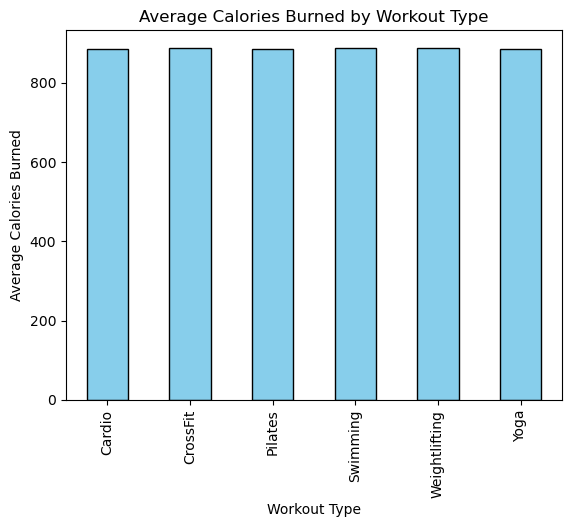

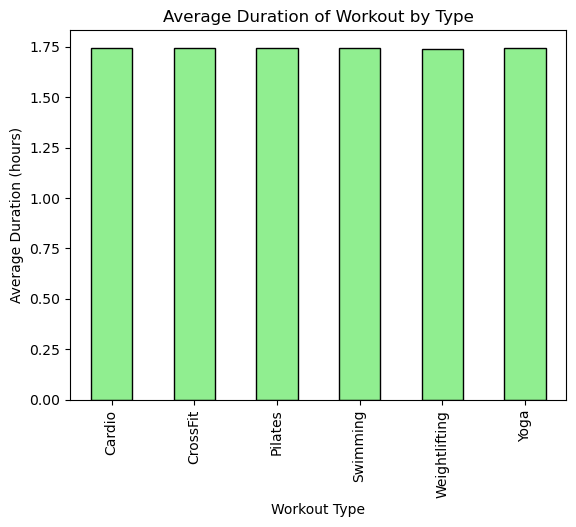

In [ ]:

# Duration and Calories Burned by Workout Type

# Ensure datetime columns are parsed correctly
checkin_data['checkin_time'] = pd.to_datetime(checkin_data['checkin_time'])
checkin_data['checkout_time'] = pd.to_datetime(checkin_data['checkout_time'])

# Calculate workout durations in hours
checkin_data['duration_hours'] = (checkin_data['checkout_time'] - checkin_data['checkin_time']).dt.total_seconds() / 3600

# Average calories burned and duration by workout type
avg_calories_burned = checkin_data.groupby('workout_type')['calories_burned'].mean()
avg_duration = checkin_data.groupby('workout_type')['duration_hours'].mean()

# Plot average calories burned by workout type
avg_calories_burned.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Workout Type')
plt.ylabel('Average Calories Burned')
plt.title('Average Calories Burned by Workout Type')
plt.show()

# Plot average duration by workout type
avg_duration.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.xlabel('Workout Type')
plt.ylabel('Average Duration (hours)')
plt.title('Average Duration of Workout by Type')
plt.show()


## Reflection
Our workout patterns analysis isn’t quite flexing yet—it doesn’t show clear preferences for different workout types either in terms of calories burned or duration. Clearly, we’re missing the nuances in workout preferences and intensity. Here’s hoping Future Me can figure out how to bring more variety into the data!🏋️‍♂️🧘‍♀️📊